In [1]:
import pyplume as pl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from time import time

In [2]:
inputname = 'namelist.input.txt'
p1_metadata = pl.plume_metadata(inputname)
D  = p1_metadata.D
dx = p1_metadata.dx
dz = p1_metadata.dz
dt = p1_metadata.dt
Ta = p1_metadata.Ta
g  = p1_metadata.g
nu  = p1_metadata.nu
threshold = p1_metadata.threshold

In [3]:
#Path to data folder
folder = r'C:\Users\thanh\OneDrive - University of Texas at San Antonio\Data\nlb.HF.CO2.h.5.0\instantaneous'

In [ ]:
# # Combining all CSV files into one matfile 
# # You only do this once
# # Take long time about 1h

# nx = 57
# start = time()
# pl.hf_csv2mat(folder,"QP",nx)
# pl.hf_csv2mat(folder,"PR",nx)
# pl.hf_csv2mat(folder,"TH",nx)
# pl.hf_csv2mat(folder,"UU",nx)
# pl.hf_csv2mat(folder,"VV",nx)
# pl.hf_csv2mat(folder,"WW",nx)
# end = time()
# print((end-start)/60)

In [4]:
# Loading matfiles
start = time()
U = pl.hf_loadmat(folder+"\\UU")
V = pl.hf_loadmat(folder+"\\VV")
W = pl.hf_loadmat(folder+"\\WW")
T = pl.hf_loadmat(folder+"\\TH")
end = time()
print((end-start)/60)

0.48435341914494834


In [5]:
nx,nz,nt = np.shape(T)
print(nx,nz)

57 701


In [6]:
# Creating a object called hf_profile1
# Around 15 mins
start = time()

hf_profile1 = pl.high_frequency_profile(T,U,V,W,nx,nz,D,Ta,g,threshold)

end = time()
print("Minutes: ",round((end-start)/60,2))

Minutes:  13.88


In [7]:
def hf_contour(data,interface,dx,dz,D,threshold,title):
    import numpy as np
    import matplotlib.pyplot as plt
    data = data.T
    interface = interface.T
    nz,nx = np.shape(data)
    plt.style.use('seaborn-white')
    xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
    zi = np.linspace(0, nz*dz/D, nz)
    plt.figure(figsize=(10, 10))
    contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
#     plt.clabel(contours, inline=True, fontsize=15)
    plt.ylabel("$z/D$",fontsize=14)
    plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
#     plt.title(title,fontsize=18,pad = 20)
    plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], origin='lower',cmap='jet',alpha=1,aspect='auto')
    plt.colorbar()
    plt.savefig(title+".png")

<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
<ipython-input-7-3417706c111a>:11: UserWarning: No contour levels were found within the data range.
  contours  = plt.co

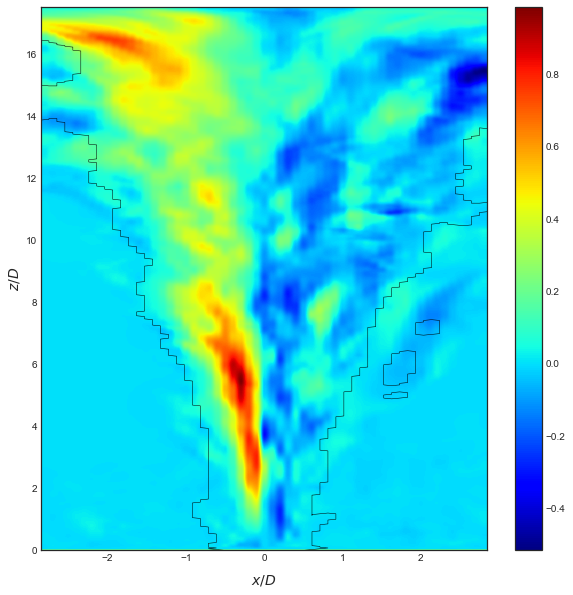

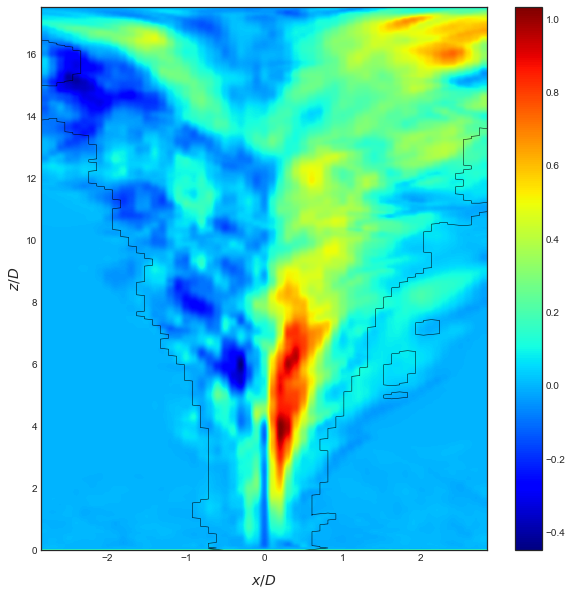

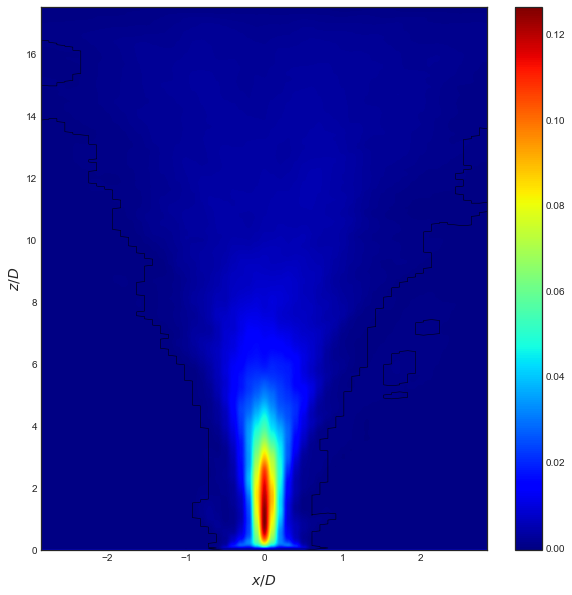

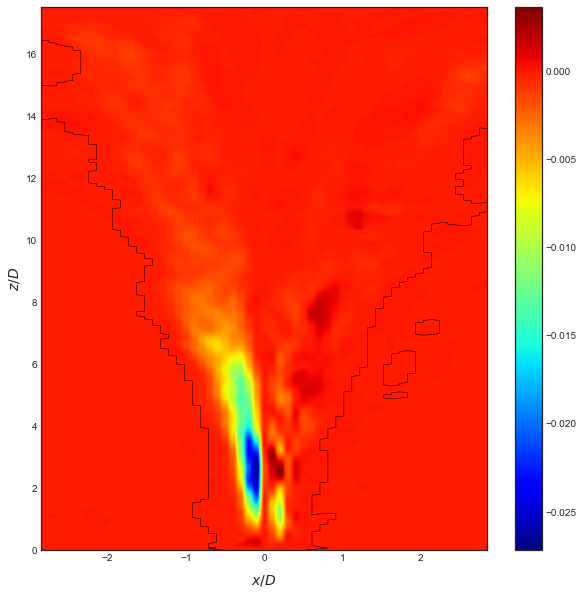

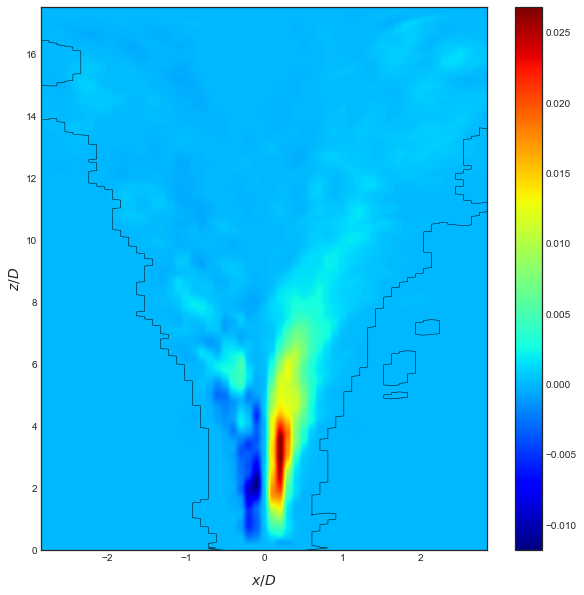

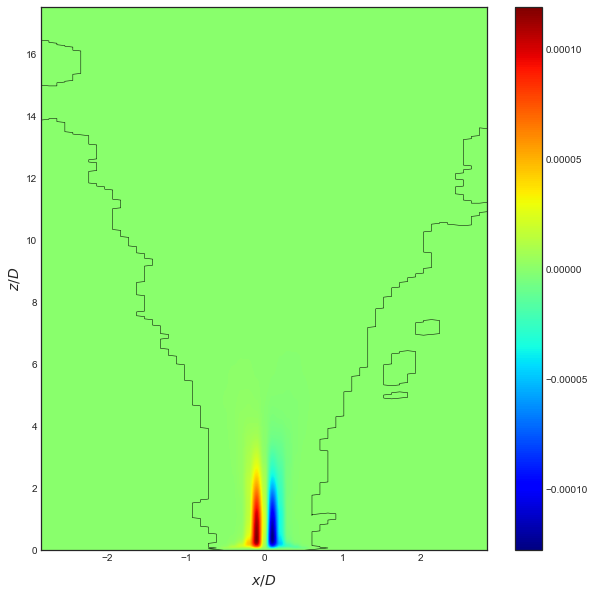

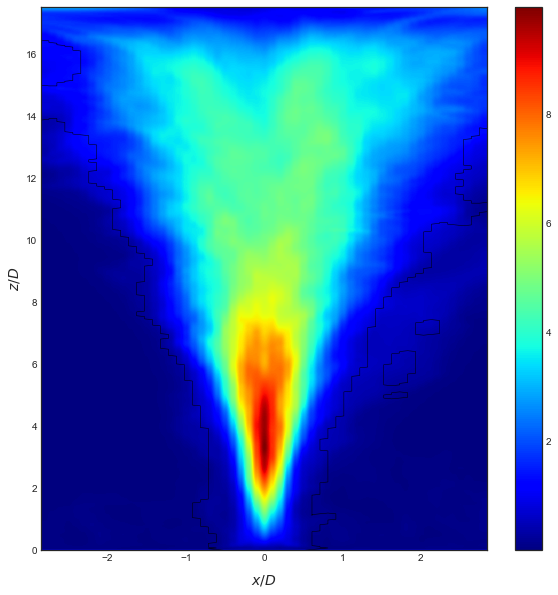

In [8]:
# Contour Plot 
hf_contour(hf_profile1.Re_stress_UW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress UW")
hf_contour(hf_profile1.Re_stress_VW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress VW")
hf_contour(hf_profile1.TKE_buoyant_production_I,hf_profile1.interface,dx,dz,D,threshold,"TKE Buoyant Production I")
hf_contour(hf_profile1.TKE_shear_pro_UW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production UW")
hf_contour(hf_profile1.TKE_shear_pro_VW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production VW")
hf_contour(hf_profile1.TKE_buoyant_production_II,hf_profile1.interface,dx,dz,D,threshold, "TKE Buoyant Production II")
hf_contour(hf_profile1.TKE, hf_profile1.interface,dx,dz,D,threshold,"TKE")

28


Text(0.5, 0, '$z/D$')

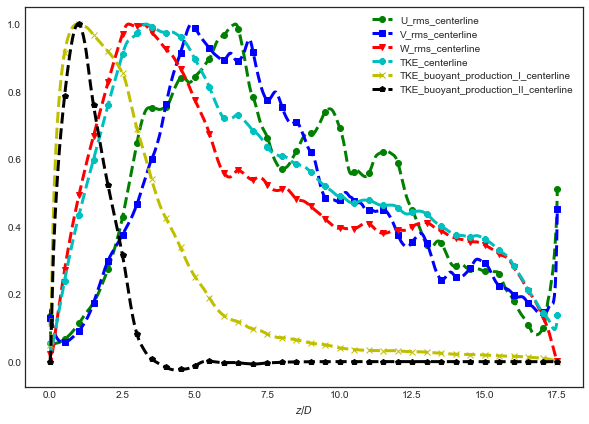

In [12]:
# Tesiting out Centerline plot

centerline = int((nx-1)/2)
print(centerline)
U_rms_centerline = hf_profile1.Re_stress_UU[centerline,:]
V_rms_centerline = hf_profile1.Re_stress_VV[centerline,:]
W_rms_centerline = hf_profile1.Re_stress_WW[centerline,:]
TKE_centerline = hf_profile1.TKE[centerline,:]
TKE_buoyant_production_I_centerline = hf_profile1.TKE_buoyant_production_I[centerline,:]
TKE_buoyant_production_II_centerline = hf_profile1.TKE_buoyant_production_II[centerline,:]


U_rms_centerline = hf_profile1.U_rms_centerline
V_rms_centerline = hf_profile1.V_rms_centerline
W_rms_centerline = hf_profile1.W_rms_centerline
TKE_centerline = hf_profile1.TKE_centerline
TKE_buoyant_production_I_centerline = hf_profile1.TKE_buoyant_production_I_centerline
TKE_buoyant_production_II_centerline = hf_profile1.TKE_buoyant_production_II_centerline


mark = 20
plt.figure(figsize=(10, 7))
zi = np.linspace(0, nz*dz/D, nz)
plotdata = U_rms_centerline/U_rms_centerline.max()
plt.plot(zi,plotdata,'go--', label='U_rms_centerline', markevery = mark, linewidth=3)
plotdata = V_rms_centerline/V_rms_centerline.max()
plt.plot(zi,plotdata,'bs--', label='V_rms_centerline',markevery = mark, linewidth=3)
plotdata = W_rms_centerline/W_rms_centerline.max()
plt.plot(zi,plotdata,'rv--', label='W_rms_centerline',markevery = mark, linewidth=3)
plotdata = TKE_centerline/TKE_centerline.max()
plt.plot(zi,plotdata,'c8--', label='TKE_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_I_centerline/TKE_buoyant_production_I_centerline.max()
plt.plot(zi,plotdata,'yx--', label='TKE_buoyant_production_I_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_II_centerline/TKE_buoyant_production_II_centerline.max()
plt.plot(zi,plotdata,'kp--', label='TKE_buoyant_production_II_centerline', markevery = mark,linewidth=3)
plt.legend()
plt.xlabel("$z/D$")
plt.savefig("HighFrequency_Centerline_Profile.png")